In [ ]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Salary Dataset**

In [ ]:
data = pd.read_csv("/content/Salary_Data (1).csv") #load the dataset
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# this describes the basic stat behind the dataset used
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

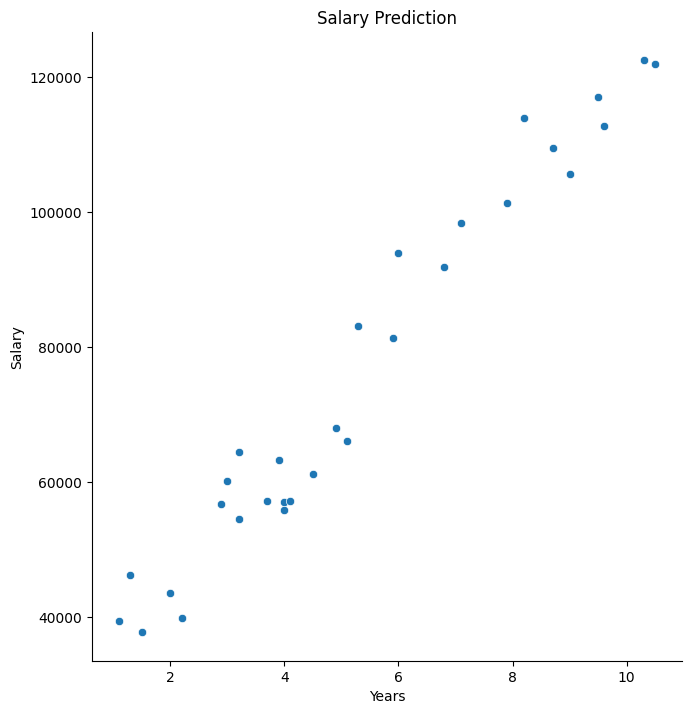

In [ ]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [ ]:
X = data['YearsExperience']
y = data['Salary']

In [ ]:
X = X.values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Split the data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)
print(X_train.shape)
print(X_test.shape)

(21, 1)
(9, 1)


In [ ]:
# Fitting the model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predict using test data
y_predict = lr_model.predict(X_test)
y_predict

array([ 61208.34198766, 117649.32424949, 125434.28732008,  65100.82352296,
        53423.37891707,  64127.70313914, 118622.44463331, 112783.72233036,
        54396.49930089])

In [ ]:
# Predicted Score of train data
train_accuracy = lr_model.score(X_train, y_train)
train_accuracy

0.9489148127897334

In [ ]:
test_accuracy = lr_model.score(X_test, y_test)
test_accuracy

0.9627668685473267

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error = ', mean_absolute_error(y_test,y_predict))
print('Mean square error = ', mean_squared_error(y_test,y_predict))
print('R2 Score = ', r2_score(y_test,y_predict))

Mean absolute error =  5010.529885004953
Mean square error =  30310299.043402452
R2 Score =  0.9627668685473267


# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =2)
x_train_poly= poly.fit_transform(X_train)
x_test_poly= poly.fit_transform(X_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
predict_train_poly = model.predict(x_train_poly)
predict_train_poly

array([ 76602.27982796, 102077.67378629,  63996.37641432,  46687.09951724,
       127904.51725269,  36192.1314478 ,  38095.62839893,  82450.02315195,
        68834.40288974,  83426.46667431,  94201.6585379 ,  40001.20493294,
        91256.73109917,  63030.3308064 ,  74657.19121907,  72714.18219307,
       105039.75778385,  56282.56863118,  44774.24444312, 109986.96236089,
        56282.56863118])

In [ ]:
predict_test_poly = model.predict(x_test_poly)
predict_test_poly

array([ 61099.79927773, 117929.5242617 , 125905.35948872,  64962.94191796,
        53398.46899192,  63996.37641432, 118924.68403005, 112961.52385578,
        54359.31564262])

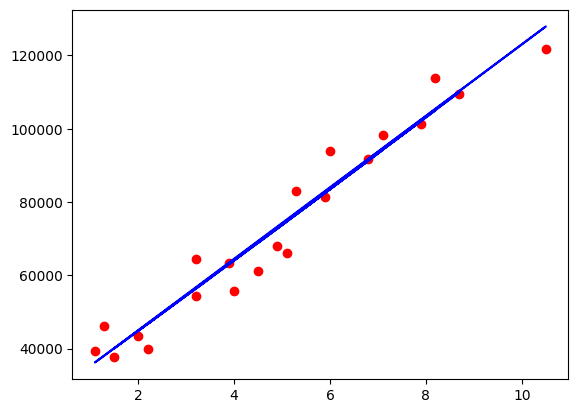

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, predict_train_poly, color = 'blue')
plt.show()

In [ ]:
train_accuracy = model.score(x_train_poly, y_train)
train_accuracy

0.948966932629059

In [ ]:
test_accuracy = model.score(x_test_poly, y_test)
test_accuracy

0.9620130638737494

In [ ]:
print('Mean absolute error = ', mean_absolute_error( y_test,predict_test_poly))
print('Mean square error = ', mean_squared_error( y_test,predict_test_poly))
print('R2 Score = ', r2_score( y_test,predict_test_poly))

Mean absolute error =  5112.269401301621
Mean square error =  30923947.269727044
R2 Score =  0.9620130638737494


# **Position Salaries Dataset**

In [ ]:
data2 = pd.read_csv("/content/Position_Salaries.csv") #load the dataset
data2

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = data2[['Level']]
y = data2[['Salary']]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

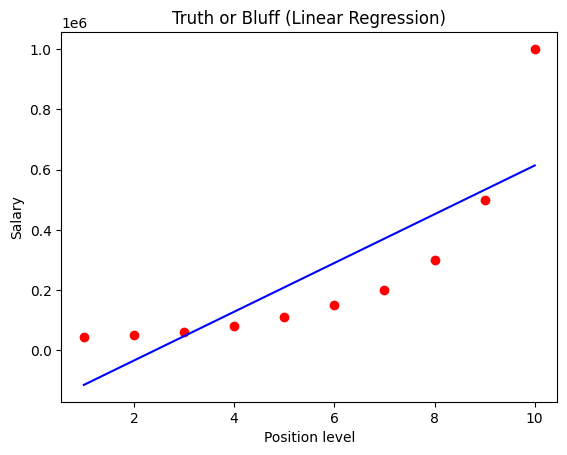

In [ ]:
#Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

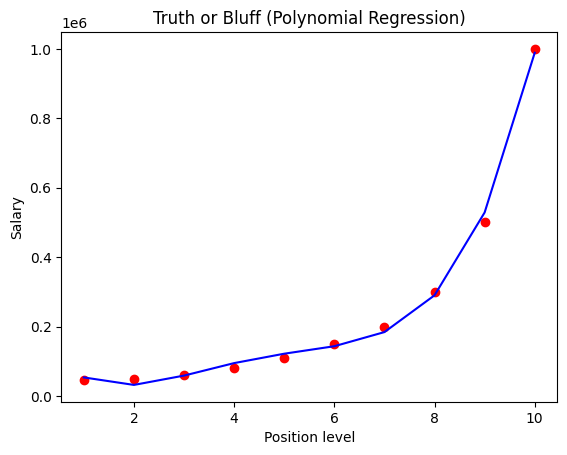

In [ ]:
#Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()